# SAHI with Ultralytics for Sliced Inference

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_ultralytics.ipynb)

## 0. Preparation

- Install latest version of SAHI and ultralytics:

In [11]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

In [12]:
#import os
#os.getcwd()

- Import required modules:

In [13]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download two test images:

In [14]:
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')
download_from_url('https://ultralytics.com/images/boats.jpg', 'demo_data/obb_test_image.png')

## 1. Standard Inference with an Ultralytics Model

- Instantiate a detection model by defining model weight path and other parameters:

In [15]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path="yolo11n.pt", # any yolov8/yolov9/yolo11/yolo12/rt-detr det model is supported
    confidence_threshold=0.35,
    device="cpu", # or 'cuda:0' if GPU is available
)

- Perform prediction by feeding the `get_prediction` function with an image path and a DetectionModel instance:

In [16]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the `get_prediction` function with a numpy image and a DetectionModel instance:

In [17]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

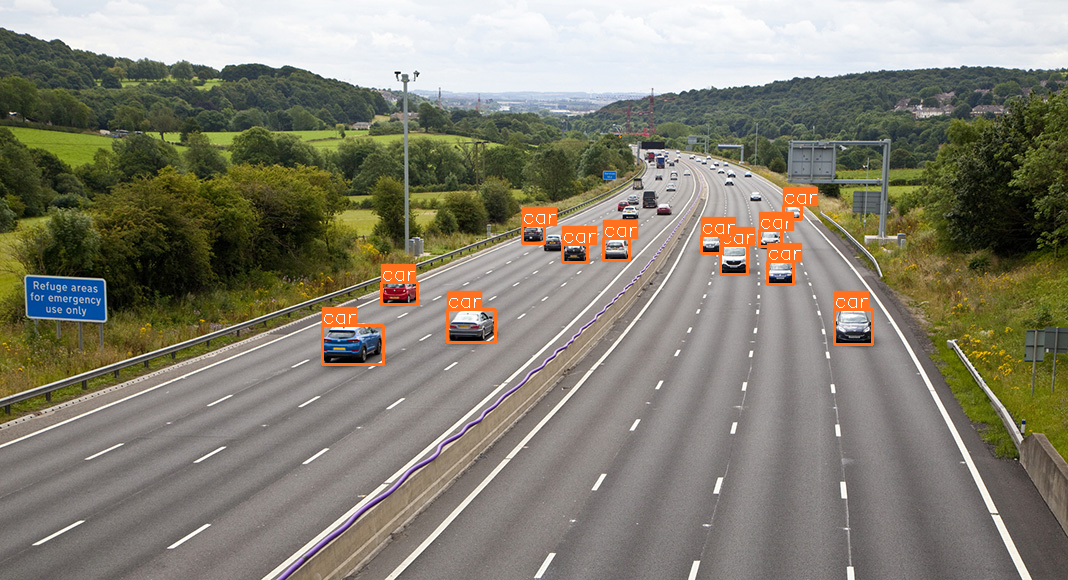

In [18]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8/YOLO11 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [19]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

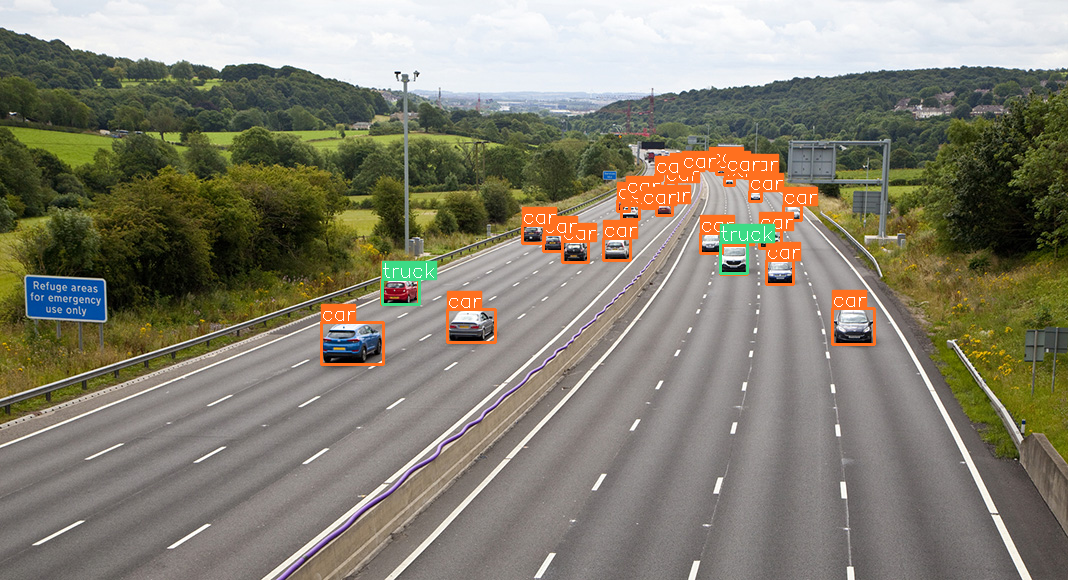

In [20]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [21]:
object_prediction_list = result.object_prediction_list

In [22]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(np.float64(447.7865905761719), np.float64(309.0754089355469), np.float64(495.3778533935547), np.float64(342.2126770019531)), w: 47.59126281738281, h: 33.13726806640625>,
    mask: None,
    score: PredictionScore: <value: 0.9220685362815857>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [23]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59126281738281,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': None,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41850280761719,
   36.02068328857422],
  'score': 0.8925947546958923,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': None,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.833130419254303,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [24]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59126281738281,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': 1,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41850280761719,
   36.02068328857422],
  'score': 0.8925947546958923,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': 1,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.833130419254303,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [25]:
!pip install imantics
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [26]:
!pip install fiftyone
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '68a5ab9a164fbedd4f197b72',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.4192758338728201,
         0.5328886360957705,
         0.044561107506912744,
         0.057133220804148704,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.9220685362815857,
     'index': None,
 }>,
 <Detection: {
     'id': '68a5ab9a164fbedd4f197b73',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7796491844377268,
         0.5322435707881533,
         0.03878136967005354,
         0.06210462635961072,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.8925947546958923,
     'index': None,
 }>,
 <Detection: {
     'id': '68a5ab9a164fbedd4f197b74',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7173953681402885,
         0.44941394411284347,
         0.025945913479122777,
         0.04061875178896147

## 4. Batch Prediction

- Set model and directory parameters:

In [27]:
model_type = "ultralytics"
model_path = 'yolo11n.pt'
model_device = "cpu" # or 'cuda:0' if GPU is available
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [28]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:03<00:09,  3.10s/it]

Prediction time is: 3019.65 ms
Performing prediction on 20 slices.


Performing inference on images:  50%|█████     | 2/4 [00:07<00:07,  3.99s/it]

Prediction time is: 4513.39 ms
Performing prediction on 15 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:10<00:03,  3.63s/it]

Prediction time is: 3119.47 ms
Performing prediction on 60 slices.


Performing inference on images: 100%|██████████| 4/4 [00:23<00:00,  5.91s/it]

Prediction time is: 12579.92 ms
Prediction results are successfully exported to runs/predict/exp


# 5 Sliced Segmentation

Run the same steps for YOLO11 segmentation model:

In [29]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")

- Perform standard segmentation:

In [30]:
result = get_prediction(im, detection_model_seg)

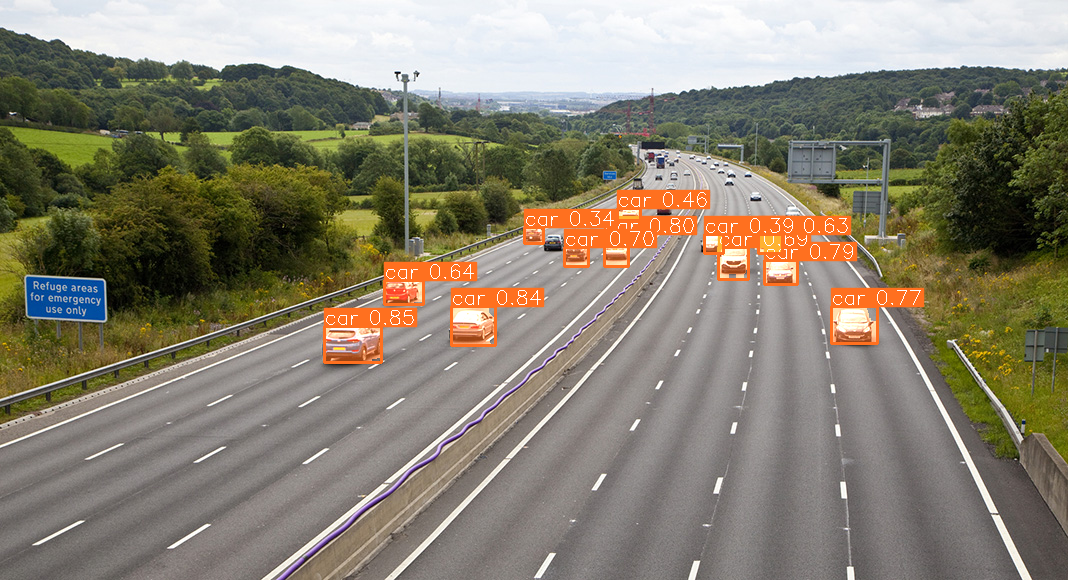

In [31]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

- Repeat for sliced segmentation:

In [32]:
result = get_sliced_prediction(
    im,
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


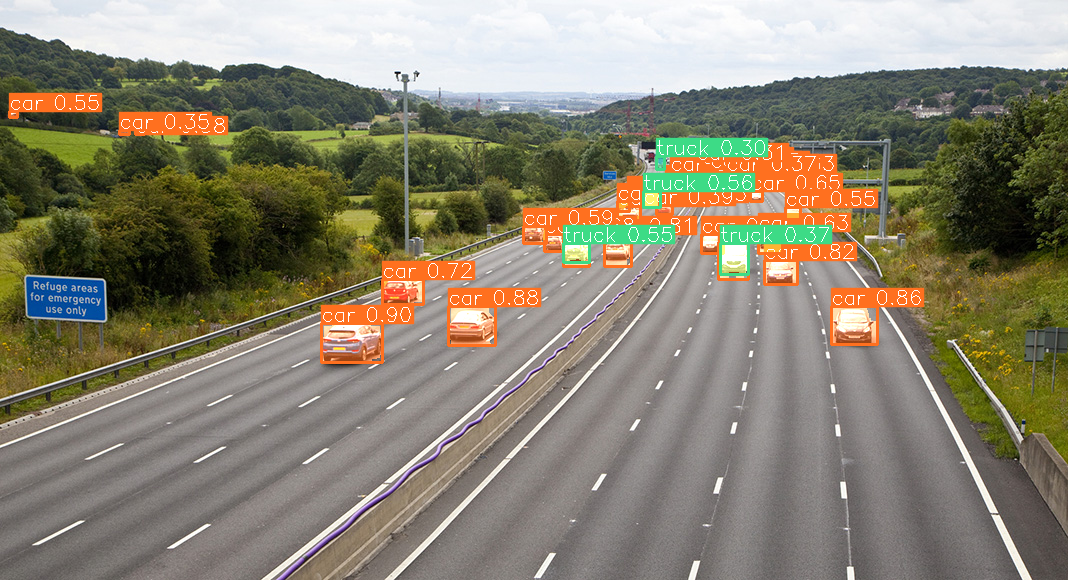

In [33]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

Sliced predictions are much better!

- Observe the prediction format:

In [34]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321, 323, 382, 362), w: 61, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7e2bc561f770>,
    score: PredictionScore: <value: 0.9011313915252686>,
    category: Category: <id: 2, name: car>>

In [35]:
object_prediction_list[0].mask.segmentation

[[322,
  338,
  321,
  338,
  321,
  356,
  321,
  357,
  322,
  357,
  323,
  358,
  323,
  359,
  323,
  360,
  324,
  361,
  325,
  362,
  326,
  362,
  328,
  362,
  342,
  362,
  344,
  360,
  356,
  360,
  358,
  362,
  365,
  362,
  367,
  360,
  371,
  360,
  371,
  359,
  372,
  358,
  376,
  358,
  377,
  357,
  379,
  357,
  379,
  355,
  381,
  353,
  381,
  351,
  382,
  351,
  382,
  336,
  381,
  335,
  380,
  334,
  380,
  333,
  379,
  332,
  379,
  326,
  371,
  326,
  370,
  325,
  369,
  325,
  368,
  324,
  368,
  323,
  335,
  323,
  335,
  324,
  334,
  325,
  333,
  325,
  332,
  325,
  332,
  326,
  324,
  326,
  324,
  336]]

In [36]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:03<00:10,  3.59s/it]

Prediction time is: 3504.68 ms
Performing prediction on 20 slices.


Performing inference on images:  50%|█████     | 2/4 [00:07<00:08,  4.01s/it]

Prediction time is: 4237.44 ms
Performing prediction on 15 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:10<00:03,  3.56s/it]

Prediction time is: 2935.73 ms
Performing prediction on 60 slices.


Performing inference on images: 100%|██████████| 4/4 [00:23<00:00,  5.82s/it]

Prediction time is: 12225.38 ms
Prediction results are successfully exported to runs/predict/exp2


# 7 Sliced OBB Prediction


In [37]:
detection_model_obb = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-obb.pt', # any yolov8/yolov9/yolo11/yolo12 obb model is supported
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/obb_test_image.png")


In [38]:
result = get_sliced_prediction(
    im,
    detection_model_obb,
    slice_height = 512,
    slice_width = 512,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
    #perform_standard_pred = False
)

Performing prediction on 15 slices.


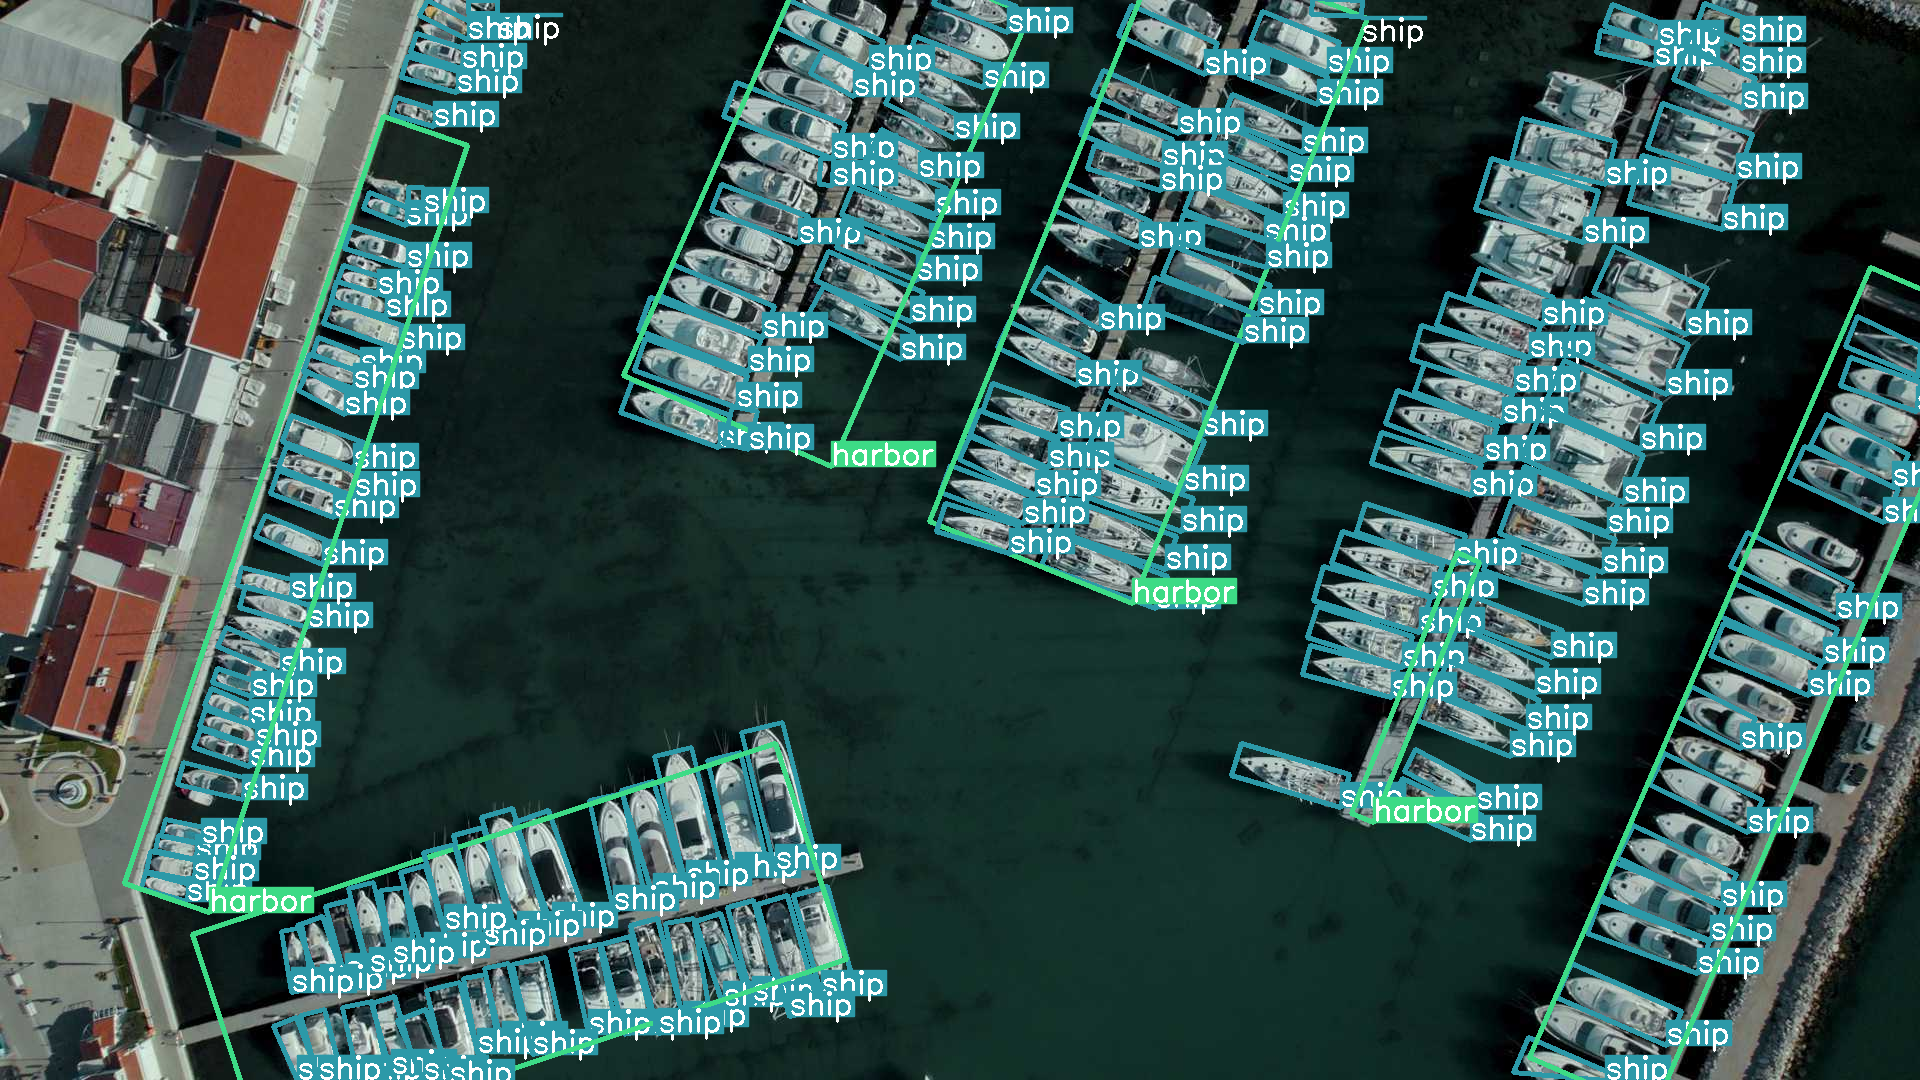

In [39]:
result.export_visuals(export_dir="demo_data/", text_size=1, rect_th=3, hide_conf=True)

Image("demo_data/prediction_visual.png", width=800)